# WeatherPy
## Analysis
* Temperature is warmest around the equator and tapers off towards the poles.
* It is more humid in the northern hemisphere.
* There are a few higher windspeeds in the northern hemisphere.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config import Wkey
from pprint import pprint as p

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [3]:
cities_df = pd.DataFrame({"City": cities,
                         "Cloudiness": "",
                          "Country": "",
                          "Date": "",
                          "Humidity":"",
                          "Lat": "",
                          "Lng": "",
                          "Max Temp": "",
                          "Wind Speed":""})

In [4]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,taolanaro,,,,,,,,
1,homer,,,,,,,,
2,oranjemund,,,,,,,,
3,tasiilaq,,,,,,,,
4,darhan,,,,,,,,


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={Wkey}&units=metric&q="

In [6]:
for index, row in cities_df.iterrows():
    city = (row["City"])
    weather = requests.get(query_url + city).json()
    try:
        print(f"Checking weather in {city}")
        cities_df.loc[index, "Cloudiness"] = weather["clouds"]["all"]
        cities_df.loc[index, "Country"] = weather["sys"]["country"]
        cities_df.loc[index, "Date"] = weather["dt"]
        cities_df.loc[index, "Humidity"] = weather ["main"]["humidity"]
        cities_df.loc[index, "Lat"] = weather["coord"]["lat"]
        cities_df.loc[index, "Lng"] = weather["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = weather["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = weather["wind"]["speed"]
    except:
        print("Cannot find City")
        


Checking weather in taolanaro
Cannot find City
Checking weather in homer
Checking weather in oranjemund
Checking weather in tasiilaq
Checking weather in darhan
Checking weather in college
Checking weather in bredasdorp
Checking weather in palmer
Checking weather in korla
Cannot find City
Checking weather in saleaula
Cannot find City
Checking weather in kitob
Checking weather in kapaa
Checking weather in sao joao da barra
Checking weather in lota
Checking weather in comodoro rivadavia
Checking weather in yulara
Checking weather in palauig
Checking weather in kruisfontein
Checking weather in nchelenge
Checking weather in samusu
Cannot find City
Checking weather in rikitea
Checking weather in tuktoyaktuk
Checking weather in ilulissat
Checking weather in lompoc
Checking weather in barrow
Checking weather in louisbourg
Cannot find City
Checking weather in flinders
Checking weather in mataura
Checking weather in atuona
Checking weather in deputatskiy
Checking weather in klaksvik
Checking wea

Checking weather in beringovskiy
Checking weather in magelang
Checking weather in timra
Checking weather in hailey
Checking weather in eldikan
Cannot find City
Checking weather in eureka
Checking weather in chapais
Checking weather in bacungan
Checking weather in skagastrond
Cannot find City
Checking weather in tiznit
Checking weather in kapoeta
Cannot find City
Checking weather in hami
Checking weather in clyde river
Checking weather in karoi
Checking weather in warrnambool
Checking weather in nara
Checking weather in aranos
Checking weather in chore
Cannot find City
Checking weather in tekkali
Checking weather in pierre
Checking weather in victoria
Checking weather in tuy hoa
Checking weather in sorong
Checking weather in berlevag
Checking weather in la ronge
Checking weather in boa vista
Checking weather in okha
Checking weather in champoton
Checking weather in cabo san lucas
Checking weather in kodiak
Checking weather in pyatnitskoye
Checking weather in pozo colorado
Checking weath

Checking weather in sarakhs
Checking weather in abu zabad
Checking weather in bokspits
Cannot find City
Checking weather in ericeira
Checking weather in teya
Checking weather in lasa
Checking weather in ponta delgada
Checking weather in zhuanghe
Checking weather in dali
Checking weather in udachnyy
Checking weather in kyzyl
Checking weather in pangnirtung
Checking weather in pangkalanbuun
Checking weather in edeia
Checking weather in novo aripuana
Checking weather in sironj
Checking weather in vlore
Checking weather in laguna
Checking weather in khani
Checking weather in ostrogozhsk
Checking weather in mangrol
Checking weather in tingo maria
Checking weather in moron
Checking weather in coihaique
Checking weather in imeni babushkina
Checking weather in saveh
Checking weather in yoichi
Checking weather in mrakovo
Checking weather in umkomaas
Checking weather in ejura
Checking weather in margate
Checking weather in humaita
Checking weather in banda aceh
Checking weather in alindao
Checki

In [7]:
cities_df = cities_df[cities_df["Cloudiness"] != ""]
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,homer,90,US,1551833558,65,59.64,-151.54,5,4.6
2,oranjemund,0,ZA,1551833694,92,-28.55,16.43,17.37,5.11
3,tasiilaq,20,GL,1551829800,44,65.61,-37.64,-7,11.3
4,darhan,0,MN,1551833695,51,49.49,105.92,-7.63,2.41
5,college,75,US,1551833645,53,64.86,-147.8,-1.11,3.46


In [9]:
# write to csv
cities_df.to_csv("CityWeather.csv")

In [10]:
# change data types to be used in graphing

cities_df["Cloudiness"] = cities_df["Cloudiness"].astype(int)
cities_df["Date"] = cities_df["Date"].astype(int)
cities_df["Humidity"] = cities_df["Humidity"].astype(int)
cities_df["Lat"] = cities_df["Lat"].astype(float)
cities_df["Lng"] = cities_df["Lng"].astype(float)
cities_df["Max Temp"] = cities_df["Max Temp"].astype(float)
cities_df["Wind Speed"] = cities_df["Wind Speed"].astype(float)

cities_df.dtypes


City           object
Cloudiness      int32
Country        object
Date            int32
Humidity        int32
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

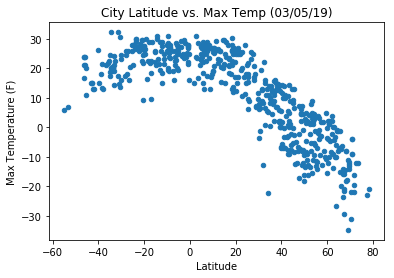

In [13]:
cities_df.plot(kind="scatter", x="Lat", y="Max Temp")
plt.title("City Latitude vs. Max Temp (03/05/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Temp.png")

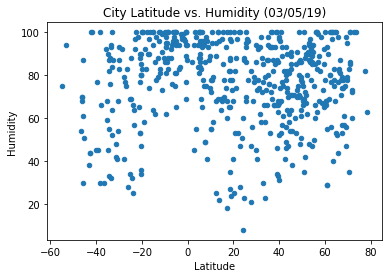

In [15]:
cities_df.plot(kind="scatter", x="Lat", y="Humidity")
plt.title("City Latitude vs. Humidity (03/05/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity.png")

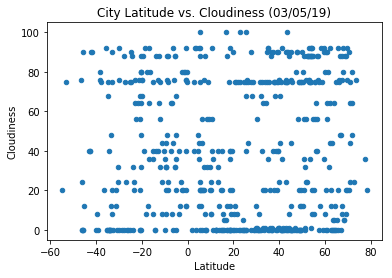

In [16]:
cities_df.plot(kind="scatter", x="Lat", y="Cloudiness")
plt.title("City Latitude vs. Cloudiness (03/05/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness.png")

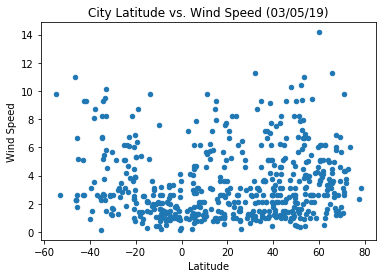

In [17]:
cities_df.plot(kind="scatter", x="Lat", y="Wind Speed")
plt.title("City Latitude vs. Wind Speed (03/05/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("WindSpeed.png")